<a href="https://colab.research.google.com/github/pirumba/deeplearning/blob/main/opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import PIL.Image
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


**Connecting to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Data Set**

In [3]:
dataset1 = "/content/drive/MyDrive/deep_learning_project/dataset1/known_images"


**SPLITING DATA SET INTO TRAIN, TEST AND VALIDATION**

---



**Training data set**

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.25, subset="training", seed=123, image_size=(100,100),batch_size=30)

Found 715 files belonging to 2 classes.
Using 537 files for training.


**Data set for Validation**

In [5]:
valid_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2,subset="validation", seed=123, image_size=(100, 100), batch_size=30)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


**Testing Data Set**

In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.05,subset="validation", seed=123, image_size=(100, 100), batch_size=30)

Found 715 files belonging to 2 classes.
Using 35 files for validation.


**Verifying** **Data** **class** **names**

In [7]:
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


**View Sample Images of Train data**

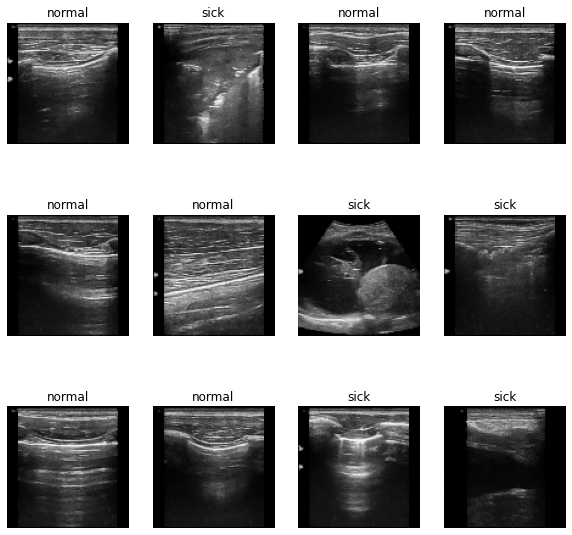

In [8]:
plt.figure(figsize=(10, 10))
for images, lebels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[lebels[i]])
    plt.axis("off")

**checking the shape of the images**

In [9]:
for image_batch, lebels_batch in train_ds:
  print(image_batch.shape)
  print(lebels_batch.shape)
  break

(30, 100, 100, 3)
(30,)


**Preprocess the Data**

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

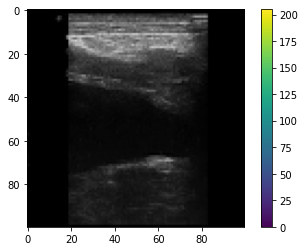

In [10]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(images[i].numpy().astype("uint8"))
#plt.imshow(train_ds[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Normalizing datasets**

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_train_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))

0.0 0.9772473


In [13]:
normalized_valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_valid_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))

0.0 0.9729237


In [14]:
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_test_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))

0.0 0.97581697


**Train and Evaluate a Model**

**Creating the Model**

In [15]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

**Compiling the model**

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Printing model summary**

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

# training and Evaluate model

In [18]:
epochs=10
history = model.fit(
normalized_train_ds, 
validation_data =normalized_train_ds,
epochs=epochs
)

Epoch 1/10
18/18 [==============================] - 20s 916ms/step - loss: 0.6949 - accuracy: 0.5047 - val_loss: 0.6923 - val_accuracy: 0.5196
Epoch 2/10
18/18 [==============================] - 10s 518ms/step - loss: 0.6934 - accuracy: 0.4823 - val_loss: 0.6930 - val_accuracy: 0.5196
Epoch 3/10
18/18 [==============================] - 10s 514ms/step - loss: 0.6930 - accuracy: 0.5196 - val_loss: 0.6928 - val_accuracy: 0.5196
Epoch 4/10
18/18 [==============================] - 10s 517ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6925 - val_accuracy: 0.5196
Epoch 5/10
18/18 [==============================] - 10s 511ms/step - loss: 0.6924 - accuracy: 0.5196 - val_loss: 0.6914 - val_accuracy: 0.5196
Epoch 6/10
18/18 [==============================] - 10s 520ms/step - loss: 0.6884 - accuracy: 0.5233 - val_loss: 0.6808 - val_accuracy: 0.5196
Epoch 7/10
18/18 [==============================] - 10s 525ms/step - loss: 0.6585 - accuracy: 0.6909 - val_loss: 0.5989 - val_accuracy: 0.8250

**Printing Training accuracy and loss curves**

Training Accuracy Vs Validation Accuracy curves

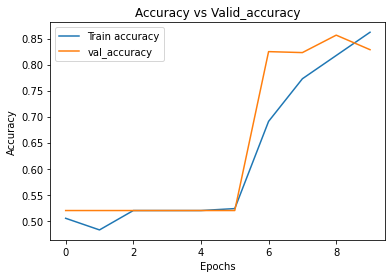

In [19]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy vs Valid_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training Loss Vs Validation loss curves

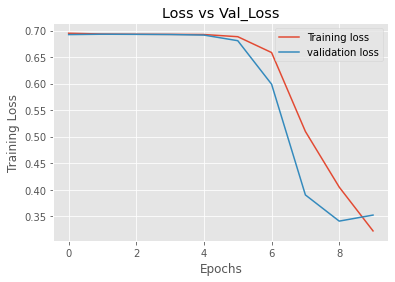

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

In [21]:
valid_loss, valid_acc = model. evaluate(normalized_valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(normalized_valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 1s 88ms/step - loss: 0.3344 - accuracy: 0.8392
0.3344198763370514
0.8391608595848083
5/5 [==============================] - 1s 89ms/step - loss: 0.3344 - accuracy: 0.8392
0.3344198763370514
0.8391608595848083


In [22]:
import os.path
if os.path.isfile('model2') is False:
  model.save('model2')
  print('the model has been saved')

the model has been saved


**Data Augmentation to reduce overfitting**

Data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [24]:
#data_augmentation = tf.keras.Sequential(
   # [
  #   layers.RandomFlip("horizontal",
  #                     input_shape=(100,
   #                                100,
   #                                3)),
   #  layers.RandomRotation(0.2),
   #  layers.RandomZoom(0.2),
   #  ]
#)

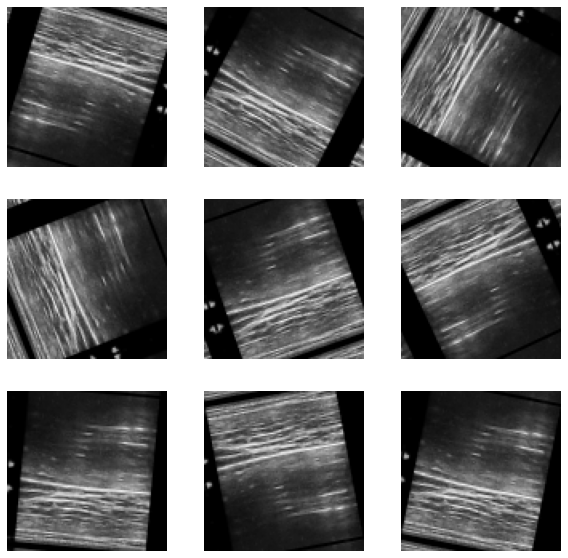

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**creating another model layer**

In [26]:
num_classes = len(class_names)
model2 = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    # model.add(normalization_layer()),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    # model2.add(normalization_layer()),
    #layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # model.add(normalization_layer()),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    
    layers.Dense(128,activation = 'relu'),
    
    layers.Dense(128,activation = 'relu'),
   
    layers.Dense(128,activation = 'relu'),
     
    layers.Dense(256,activation = 'relu'),
    
    layers.Dense(256,activation = 'relu'),
     
    layers.Dense(num_classes)
])

In [27]:
# # dropout in the input layer with weight constraint
# num_classes = len(class_names)
# model2 = tf.keras.Sequential([
# #def create_model2():
# 	# create model
# #	model2 = Sequential()
# 	model.add(Dropout(0.2, input_shape=(60,)))
# 	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
# 	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
# 	model.add(Dense(1, activation='sigmoid'))
# 	# Compile model
# 	sgd = SGD(learning_rate=0.1, momentum=0.9)
# 	model.compile(loss='binary_crossentropy', optimizer=sgd, 
#   metrics=['accuracy'])
# 	return model
 

**Compile the model2**

In [28]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2 summary

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)       

In [30]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

# def get_callbacks(name):
#   return [
#     tfdocs.modeling.EpochDots(),
#     tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
#     tf.keras.callbacks.TensorBoard(logdir/name),
#   ]

epochs=15
history2 = model2.fit(
valid_ds, 
validation_data =valid_ds,
epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 5s 781ms/step - loss: 0.6927 - accuracy: 0.5315 - val_loss: 0.6768 - val_accuracy: 0.7063
Epoch 2/15
5/5 [==============================] - 4s 725ms/step - loss: 0.6295 - accuracy: 0.6503 - val_loss: 0.4820 - val_accuracy: 0.8112
Epoch 3/15
5/5 [==============================] - 4s 719ms/step - loss: 0.4402 - accuracy: 0.8462 - val_loss: 0.2866 - val_accuracy: 0.9091
Epoch 4/15
5/5 [==============================] - 4s 709ms/step - loss: 0.2990 - accuracy: 0.8671 - val_loss: 0.2542 - val_accuracy: 0.8881
Epoch 5/15
5/5 [==============================] - 4s 710ms/step - loss: 0.2772 - accuracy: 0.8741 - val_loss: 0.1824 - val_accuracy: 0.9301
Epoch 6/15
5/5 [==============================] - 4s 712ms/step - loss: 0.2970 - accuracy: 0.8951 - val_loss: 0.3349 - val_accuracy: 0.8811
Epoch 7/15
5/5 [==============================] - 4s 717ms/step - loss: 0.3087 - accuracy: 0.9091 - val_loss: 0.1662 - val_accuracy: 0.9510
Epoch 8/15
5/5 [====

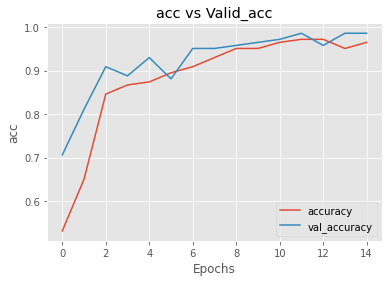

In [31]:
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.title("acc vs Valid_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

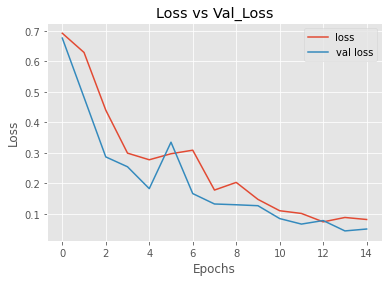

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
dataset_1 = "/content/drive/MyDrive/deep_learning_project1/dataset1/known_images/sick/sick_152.png"

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to sick with a 99.80 percent confidence


In [34]:
dataset_2 = "/content/drive/MyDrive/deep_learning_project1/dataset1/known_images/normal/normal_102.png"

img = tf.keras.utils.load_img(dataset_2, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 99.99 percent confidence


In [35]:
dataset_3 = "/content/drive/MyDrive/deep_learning_project1/dataset1/unknown_images/unknown/14.png"

img = tf.keras.utils.load_img(dataset_3, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to sick with a 98.52 percent confidence


In [36]:
dataset_4 = "/content/drive/MyDrive/deep_learning_project1/dataset1/unknown_images/unknown/20.png"

img = tf.keras.utils.load_img(dataset_4, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)


This image most likely belongs to sick with a 100.00 percent confidence


In [37]:
dataset_5 = "/content/drive/MyDrive/deep_learning_project1/dataset2/images/sick_eff110.png"

img = tf.keras.utils.load_img(dataset_5, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 97.31 percent confidence


Found 715 files belonging to 2 classes.
predictions:
 [0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 1 1 0]
Labels:
 [0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 1 1 0]


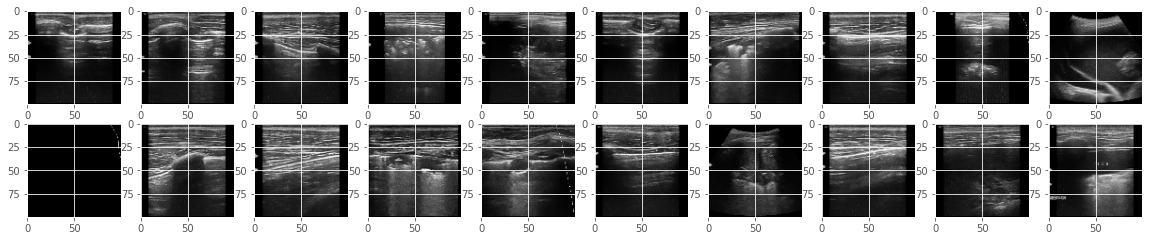

In [38]:
dataset_6 = "/content/drive/MyDrive/deep_learning_project1/dataset1/known_images"
test_ds = tf.keras.utils.image_dataset_from_directory(dataset_6, image_size=(100, 100), batch_size=50)
#AUTOTUNE = tf.data.AUTOTUNE
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [39]:
import pandas as pd
import numpy as np
DF = pd.DataFrame(predictions)
DF.to_csv("image_results0.csv")

In [40]:
y_pred = []
y_true = []

for image_batch, label_batch in valid_ds:

  y_true.append(label_batch)

  predictions = model2.predict(image_batch)

  y_pred.append(np.argmax(predictions, axis = -1))

correct_labels = tf.concat([item for item in y_true],axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis =0)

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
print(cm)

[[74  2]
 [ 0 67]]


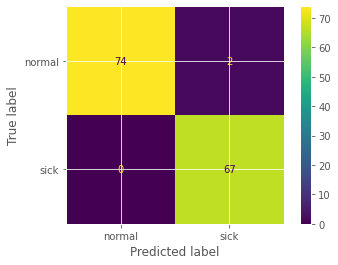

In [41]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(predicted_labels,correct_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.97      1.00      0.99        67

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Found 50 files belonging to 1 classes.
predictions:
 [0 1 0 1 1 1 1 1 0 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0]


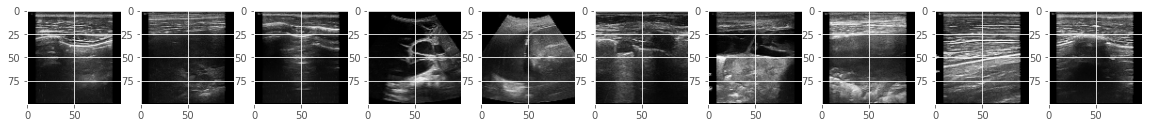

In [43]:
dataset_9 = "/content/drive/MyDrive/deep_learning_project1/dataset1/unknown_images"
test_ds5 = tf.keras.utils.image_dataset_from_directory(dataset_9, image_size=(100, 100), batch_size=10)
AUTOTUNE = tf.data.AUTOTUNE
image_batch, label_batch = test_ds5.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(10):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [44]:
y_pred = []
y_true = []

for image_batch, label_batch in test_ds5:

  y_true.append(label_batch)

  predictions = model2.predict(image_batch)

  y_pred.append(np.argmax(predictions, axis = -1))

correct_labels2 = tf.concat([item for item in y_true],axis = 0)
predicted_labels2 = tf.concat([item for item in y_pred], axis =0)

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels2, correct_labels2)
print(cm)

[[30  0]
 [20  0]]


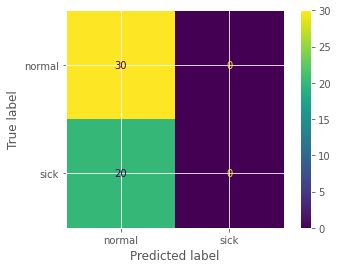

In [45]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(predicted_labels2,correct_labels2))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        30
           1       0.00      0.00      0.00        20

    accuracy                           0.60        50
   macro avg       0.30      0.50      0.37        50
weighted avg       0.36      0.60      0.45        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
dataset_7 = "/content/drive/MyDrive/deep_learning_project1/dataset2/"
test_ds2 = tf.keras.utils.image_dataset_from_directory(dataset_7, image_size=(100, 100), batch_size=20)

Found 224 files belonging to 1 classes.


In [48]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valid_ds7 = valid_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [49]:
normalization_layer = layers.Rescaling(1./255)

In [50]:
normalized_ds2 = test_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_ds2))
first_image = image_batch[3]

print(np.min(first_image), np.max(first_image))

0.0 0.6908702


In [51]:
dataset2 = "/content/drive/MyDrive/deep_learning_project1/dataset2"
test_ds3 = tf.keras.utils.image_dataset_from_directory(dataset2, image_size=(100, 100), batch_size=20)

Found 224 files belonging to 1 classes.


In [52]:
# normalized_ds3 = test_ds3.map(lambda x, y: (normalization_layer(x), y))
# image_batch, lebels_batch = next(iter(normalized_valid_ds))
# first_image = image_batch[3]
# print(np.min(first_image), np.max(first_image))

In [53]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
# ])

predictions:
 [1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


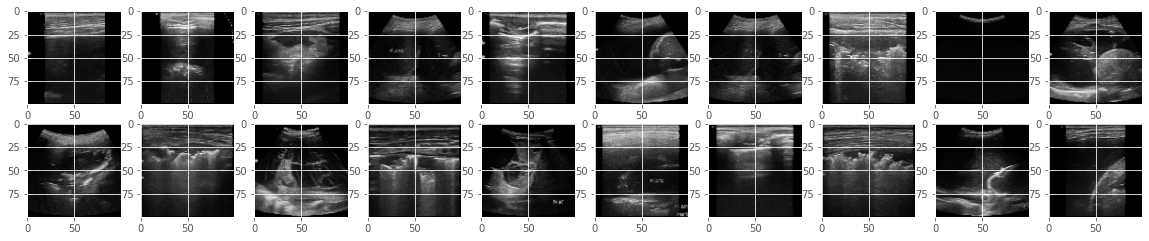

In [54]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch)

predictions = tf.math.argmax(predictions, 1)

print('predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(image_batch[i].astype("uint8"))

In [55]:
import pandas as pd
import numpy as np
DF = pd.DataFrame(predictions)
DF.to_csv("image_results3.csv")

In [56]:
valid_loss, valid_acc = model. evaluate(valid_ds)
print(valid_loss)
print(valid_acc)

training_loss, training_acc = model.evaluate(valid_ds)
print(training_loss)
print(training_acc)

5/5 [==============================] - 1s 95ms/step - loss: 109.4312 - accuracy: 0.7762
109.43124389648438
0.7762237787246704
5/5 [==============================] - 1s 94ms/step - loss: 109.4313 - accuracy: 0.7762
109.4312515258789
0.7762237787246704


In [57]:
y_pred = []
y_true = []

for image_batch, label_batch in test_ds3:

  y_true.append(label_batch)

  predictions = model2.predict(image_batch)

  y_pred.append(np.argmax(predictions, axis = -1))

correct_labels3 = tf.concat([item for item in y_true],axis = 0)
predicted_labels3 = tf.concat([item for item in y_pred], axis =0)

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels3, correct_labels3)
print(cm)

[[ 45   0]
 [179   0]]


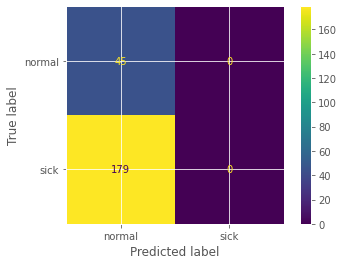

In [58]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(predicted_labels3,correct_labels3))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        45
           1       0.00      0.00      0.00       179

    accuracy                           0.20       224
   macro avg       0.10      0.50      0.17       224
weighted avg       0.04      0.20      0.07       224



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
dataset_8 = "/content/drive/MyDrive/deep_learning_project/dataset2/images/sick_eif48.png"

img = tf.keras.utils.load_img(dataset_8, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions =model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

This image most likely belongs to normal with a 99.95 percent confidence


In [61]:
import pandas as pd
import numpy as np
DF = pd.DataFrame(predictions)
DF.to_csv("image_results1.csv")

In [62]:
y_pred = []
y_true = []

for image_batch, label_batch in valid_ds:

  y_true.append(label_batch)

  predictions = model2.predict(image_batch)

  y_pred.append(np.argmax(predictions, axis = -1))

correct_labels5 = tf.concat([item for item in y_true],axis = 0)
predicted_labels5 = tf.concat([item for item in y_pred], axis =0)

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels5, correct_labels5)
print(cm)

[[74  2]
 [ 0 67]]


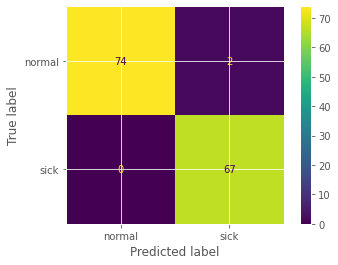

In [63]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot()

In [64]:
# y_pred = []
# y_true = []

# for image_batch, label_batch in test_ds2:

#   y_true.append(label_batch)

#   predictions = model2.predict(image_batch)

#   y_pred.append(np.argmax(predictions, axis = -1))

# correct_labels = tf.concat([item for item in y_true],axis = 0)
# predicted_labels = tf.concat([item for item in y_pred], axis =0)

# from sklearn.metrics._plot.confusion_matrix import confusion_matrix
# cm=confusion_matrix(predicted_labels,correct_labels)
# print(cm)

In [65]:
# from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
# disp.plot()

# plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(predicted_labels5,correct_labels5))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.97      1.00      0.99        67

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

